Project: Network Intrusion Detection  
Group No: 10  
Group Members: Abiodun Ojo & Sohrab Salehi  
Notebook copied with edits from Jai Joshi at https://www.kaggle.com/joshijai2/ids-using-xgb-and-lightgbm-with-feature-selection  

Requirements:  
Install lightgbm by "pip install lightgbm"  
Install xgboost by "pip install xgboost"

In [1]:
# Data Manipulation libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for normalization
from sklearn.preprocessing import StandardScaler
# for encoding
from sklearn.preprocessing import LabelEncoder
# for feature selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# for model selection and training
from sklearn.naive_bayes import BernoulliNB 
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score

# for data splitting
from sklearn.model_selection import train_test_split

# for model evaluation
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Seed for random state
SEED = 76
print("Library import complete.")
print("Group No: 10\nMembers: Abiodun Ojo\n\t Sohrab Salehi")

Library import complete.
Group No: 10
Members: Abiodun Ojo
	 Sohrab Salehi


In [2]:
df = pd.read_csv("../Dataset/Train_data.csv")
print("Dataset read successful.\nGroup No: 10\nMembers: Abiodun Ojo\n\t Sohrab Salehi")

Dataset read successful.
Group No: 10
Members: Abiodun Ojo
	 Sohrab Salehi


In [3]:
print("Group No: 10\nMembers: Abiodun Ojo\n\t Sohrab Salehi\n")
print("Training data has {} rows & {} columns".format(df.shape[0],df.shape[1]))
df.head()

Group No: 10
Members: Abiodun Ojo
	 Sohrab Salehi

Training data has 25192 rows & 42 columns


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("class", axis=1), df["class"], test_size=0.3, random_state=SEED)


Group No: 10
Members: Abiodun Ojo
	 Sohrab Salehi


<AxesSubplot:>

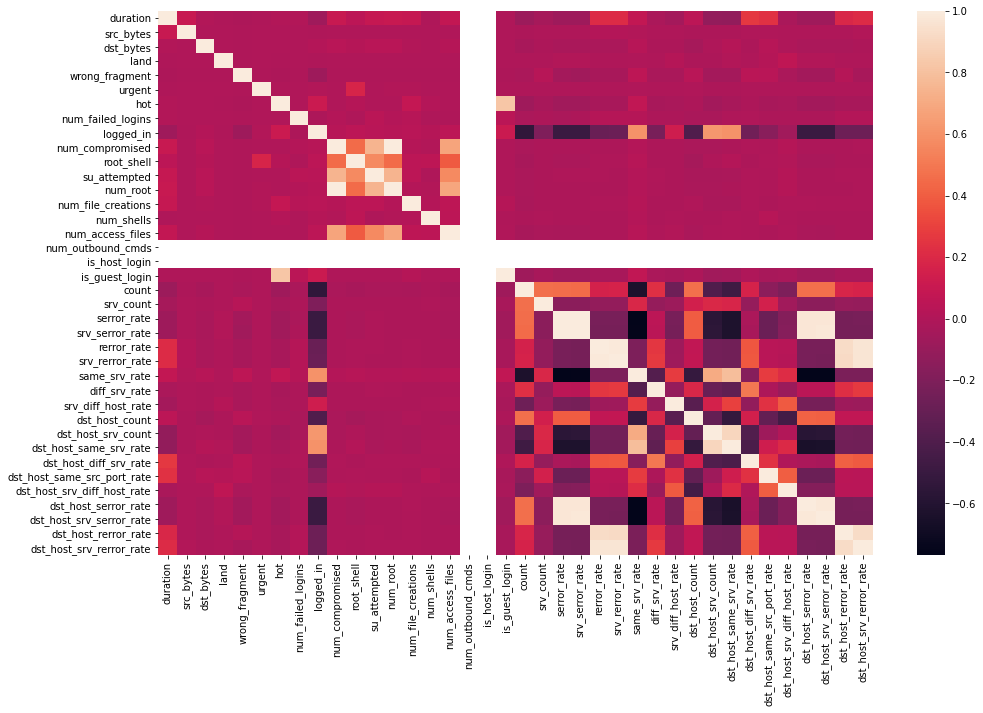

In [5]:
print("\nGroup No: 10\nMembers: Abiodun Ojo\n\t Sohrab Salehi")
# Correlation Heatmap
plt.figure(figsize=(16,10))
sns.heatmap(X_train.corr())

In [6]:
print("\nGroup No: 10\nMembers: Abiodun Ojo\n\t Sohrab Salehi")
print(X_train['is_host_login'].value_counts())
print(X_train['num_outbound_cmds'].value_counts())


Group No: 10
Members: Abiodun Ojo
	 Sohrab Salehi
0    17634
Name: is_host_login, dtype: int64
0    17634
Name: num_outbound_cmds, dtype: int64


In [7]:
# Data Analysis and preprocessing
X_train.info()
print("\nGroup No: 10\nMembers: Abiodun Ojo\n\t Sohrab Salehi")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17634 entries, 3008 to 2721
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     17634 non-null  int64  
 1   protocol_type                17634 non-null  object 
 2   service                      17634 non-null  object 
 3   flag                         17634 non-null  object 
 4   src_bytes                    17634 non-null  int64  
 5   dst_bytes                    17634 non-null  int64  
 6   land                         17634 non-null  int64  
 7   wrong_fragment               17634 non-null  int64  
 8   urgent                       17634 non-null  int64  
 9   hot                          17634 non-null  int64  
 10  num_failed_logins            17634 non-null  int64  
 11  logged_in                    17634 non-null  int64  
 12  num_compromised              17634 non-null  int64  
 13  root_shell    

In [8]:
# 'num_outbound_cmds' and 'is_host_login' are redundant column so remove it from data.
X_train.drop(['num_outbound_cmds','is_host_login'], axis=1, inplace=True)
X_test.drop(['num_outbound_cmds','is_host_login'], axis=1, inplace=True)

In [9]:
print("\nGroup No: 10\nMembers: Abiodun Ojo\n\t Sohrab Salehi")
# Descriptive analysis of the data after dropping the two 0 cols.
X_train.describe()


Group No: 10
Members: Abiodun Ojo
	 Sohrab Salehi


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,17634.000000,1.763400e+04,1.763400e+04,17634.000000,17634.000000,17634.000000,17634.000000,17634.000000,17634.00000,17634.000000,...,17634.000000,17634.000000,17634.000000,17634.000000,17634.000000,17634.000000,17634.000000,17634.000000,17634.000000,17634.000000
mean,302.901951,3.132080e+04,3.696143e+03,0.000057,0.022457,0.000057,0.196779,0.001304,0.39662,0.254452,...,182.337076,115.084950,0.519329,0.082624,0.147755,0.031267,0.287566,0.281408,0.116918,0.117713
std,2696.247146,2.879813e+06,9.071815e+04,0.007531,0.253944,0.007531,2.161583,0.049365,0.48921,11.174054,...,99.082242,110.597369,0.448864,0.187723,0.308375,0.108164,0.445937,0.446679,0.305233,0.316154
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,255.000000,62.000000,0.500000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.810000e+02,5.430000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.000000,77.000000,4.000000,1.00000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Exploratory Data Analysis


Group No: 10
Members: Abiodun Ojo
	 Sohrab Salehi


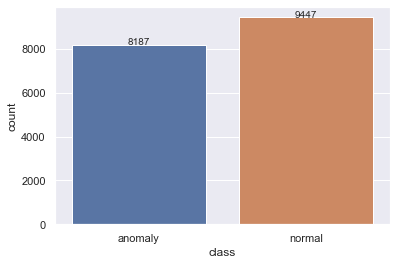

In [10]:
# Target Class Distribution
print("\nGroup No: 10\nMembers: Abiodun Ojo\n\t Sohrab Salehi")
sns.set_theme(style="darkgrid")
ax = sns.countplot(y_train)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 10)


Group No: 10
Members: Abiodun Ojo
	 Sohrab Salehi


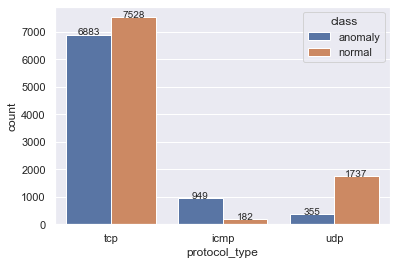

In [11]:
print("\nGroup No: 10\nMembers: Abiodun Ojo\n\t Sohrab Salehi")
ax = sns.countplot(X_train['protocol_type'], hue=y_train)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 10)


Group No: 10
Members: Abiodun Ojo
	 Sohrab Salehi


<AxesSubplot:xlabel='flag', ylabel='count'>

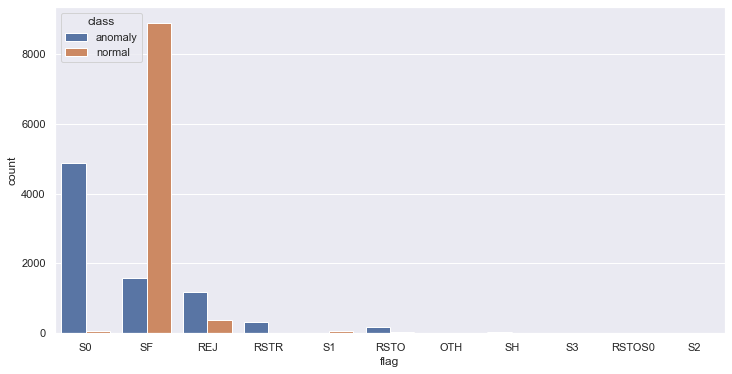

In [12]:
print("\nGroup No: 10\nMembers: Abiodun Ojo\n\t Sohrab Salehi")
plt.figure(figsize=(12,6))
sns.countplot(X_train['flag'], hue=y_train)


Group No: 10
Members: Abiodun Ojo
	 Sohrab Salehi


<AxesSubplot:xlabel='count'>

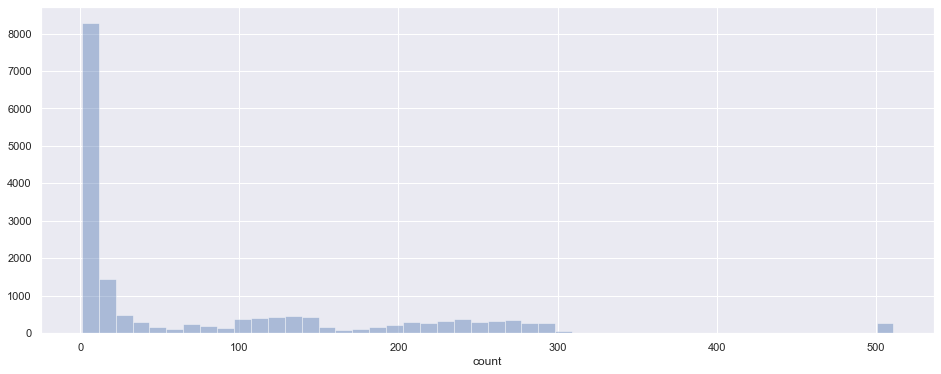

In [13]:
print("\nGroup No: 10\nMembers: Abiodun Ojo\n\t Sohrab Salehi")
plt.figure(figsize=(16,6))
sns.distplot(X_train['count'], kde=False)


Group No: 10
Members: Abiodun Ojo
	 Sohrab Salehi


<AxesSubplot:xlabel='dst_host_srv_count', ylabel='Density'>

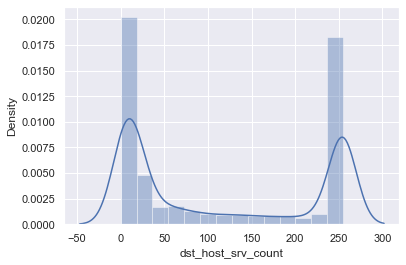

In [14]:
print("\nGroup No: 10\nMembers: Abiodun Ojo\n\t Sohrab Salehi")
sns.distplot(X_train.dst_host_srv_count)

Observations

In [15]:
# Encoding target class to 0 and 1
y_train = y_train.apply(lambda x: 1 if x=="anomaly" else 0)
y_test = y_test.apply(lambda x: 1 if x=="anomaly" else 0)


Group No: 10
Members: Abiodun Ojo
	 Sohrab Salehi


<AxesSubplot:>

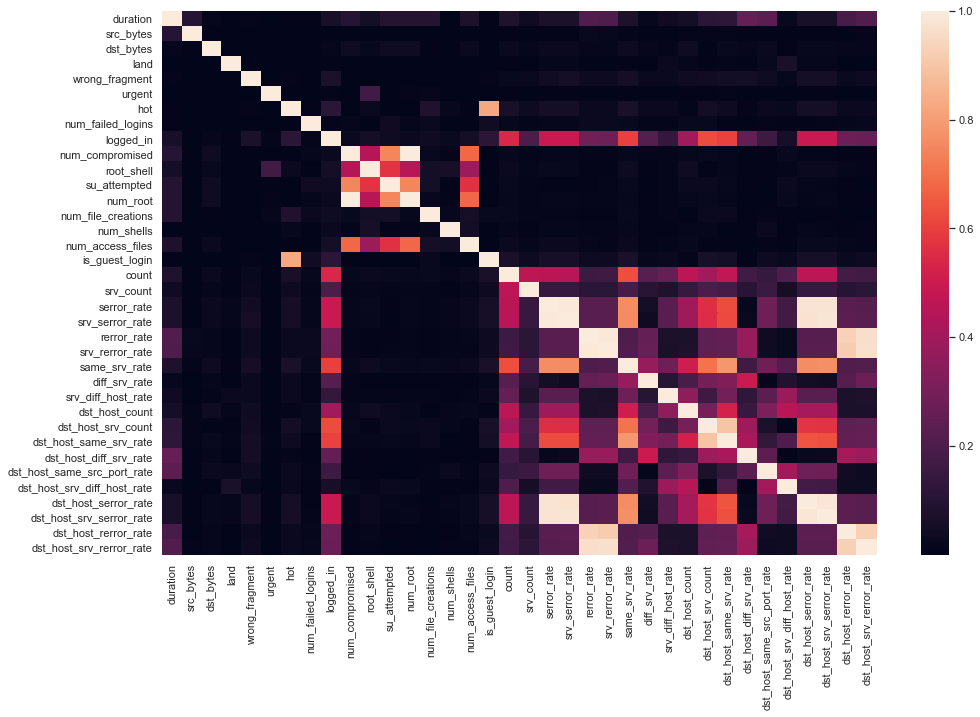

In [16]:
print("\nGroup No: 10\nMembers: Abiodun Ojo\n\t Sohrab Salehi")
# Correlation Heatmap
plt.figure(figsize=(16,10))
sns.heatmap(X_train.corr().apply(abs))

In [17]:
print("\nGroup No: 10\nMembers: Abiodun Ojo\n\t Sohrab Salehi")
corr_with_target = X_train.corrwith(y_train).apply(abs)
corr_with_target[corr_with_target>0.7]


Group No: 10
Members: Abiodun Ojo
	 Sohrab Salehi


same_srv_rate         0.753465
dst_host_srv_count    0.721338
dtype: float64

Encoding Categorical Data

In [18]:
# Custom Label Encoder for handling unknown values
class LabelEncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()

    def fit(self, data):
        self.label_encoder = self.label_encoder.fit(list(data) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self

    def transform(self, data):
        new_data = list(data)
        for unique_item in np.unique(data):
            if unique_item not in self.label_encoder.classes_:
                new_data = ['Unknown' if x==unique_item else x for x in new_data]
        return self.label_encoder.transform(new_data)

In [19]:
le = LabelEncoderExt()

# encode the selected columns
for col in X_train.select_dtypes("object"):
  le.fit(X_train[col])
  X_train[col] = le.transform(X_train[col])
  X_test[col] = le.transform(X_test[col])

Normalizing the numerical data

In [20]:
scaler = StandardScaler()
# store the columns
cols = X_train.columns

# transform the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = cols)

Feature Selection

In [21]:
rfc = RandomForestClassifier();

rfc.fit(X_train_scaled, y_train)

feat_imp = pd.DataFrame({'feature':X_train.columns,'importance':rfc.feature_importances_})
feat_imp = feat_imp.sort_values('importance',ascending=False).set_index('feature')

Visualization of the Feature Importances


Group No: 10
Members: Abiodun Ojo
	 Sohrab Salehi


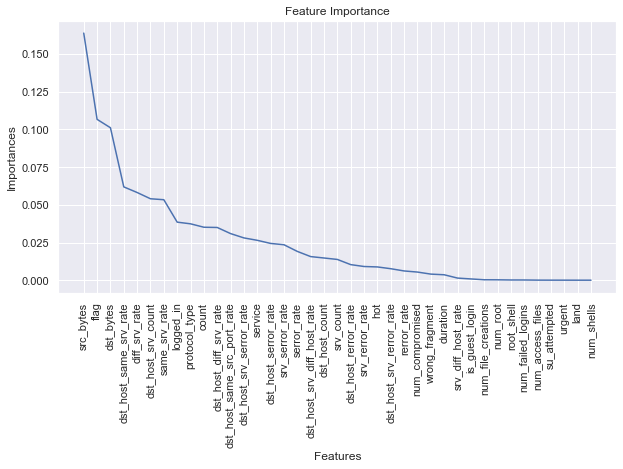

In [22]:
print("\nGroup No: 10\nMembers: Abiodun Ojo\n\t Sohrab Salehi")
# plot feat_imp
plt.figure(figsize = (10, 5))
plt.title("Feature Importance")
plt.ylabel("Importances")
plt.xlabel("Features")
plt.xticks(rotation=90)
plt.plot(feat_imp)

Using recursive feature elimination for Feature Selection

In [23]:
estimator = RandomForestClassifier()
selector = RFE(estimator)
selector.fit(X_train_scaled, y_train)

X_train_scaled = selector.transform(X_train_scaled)
X_test_scaled = selector.transform(X_test_scaled)

Model Selection

In [24]:
# Gaussian Naive Bayes Model
bnb = BernoulliNB()

In [25]:
# Train XGBoost Classifier
xgbc = XGBClassifier(eval_metric="logloss", random_state=SEED)

# Train LightGBM Classifier
lgbmc = LGBMClassifier(random_state=SEED)

Model Testing on Validation Data

In [26]:
models = {}
models['Naive Bayes Classifier']= bnb
models['XGBoost Classifier']= xgbc
models['LightGBM Classifier']= lgbmc
scores = {}
for name in models:
  scores[name]={}
  for scorer in ['precision','recall']:
    scores[name][scorer] = cross_val_score(models[name], X_train_scaled, y_train, cv=10, scoring=scorer)

In [27]:
def line(name):
  return '-'*(25-len(name)//2)

for name in models:
  print(line(name), name, 'Model Validation', line(name))

  for scorer in ['precision','recall']:
    mean = round(np.mean(scores[name][scorer])*100,2)
    stdev = round(np.std(scores[name][scorer])*100,2)
    print ("Mean {}:".format(scorer),"\n", mean,"%", "+-",stdev)
    print()
print("\nGroup No: 10\nMembers: Abiodun Ojo\n\t Sohrab Salehi")

-------------- Naive Bayes Classifier Model Validation --------------
Mean precision: 
 94.05 % +- 0.52

Mean recall: 
 83.6 % +- 1.21

---------------- XGBoost Classifier Model Validation ----------------
Mean precision: 
 99.8 % +- 0.11

Mean recall: 
 99.58 % +- 0.27

---------------- LightGBM Classifier Model Validation ----------------
Mean precision: 
 99.87 % +- 0.07

Mean recall: 
 99.62 % +- 0.22


Group No: 10
Members: Abiodun Ojo
	 Sohrab Salehi


Write here

In [28]:
for name in models:
    for scorer in ['precision','recall']:
        scores[name][scorer] = scores[name][scorer].mean()
scores=pd.DataFrame(scores).swapaxes("index", "columns")*100


Group No: 10
Members: Abiodun Ojo
	 Sohrab Salehi


array([<AxesSubplot:ylabel='precision'>, <AxesSubplot:ylabel='recall'>],
      dtype=object)

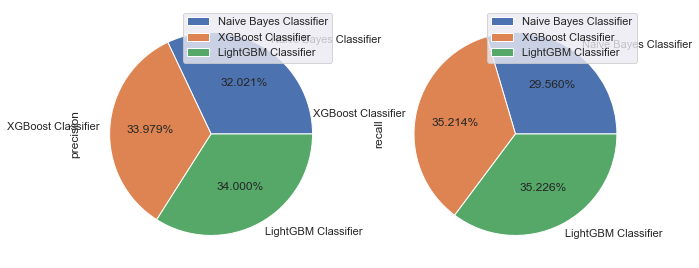

In [29]:
print("\nGroup No: 10\nMembers: Abiodun Ojo\n\t Sohrab Salehi")
scores.plot.pie(subplots=True, figsize=(10,6), autopct='%1.3f%%')

In [30]:
models = {}
models['Naive Bayes Classifier']= bnb
models['XGBoost Classifier']= xgbc
models['LightGBM Classifier']= lgbmc
preds={}
for name in models:
    models[name].fit(X_train_scaled, y_train)
    preds[name] = models[name].predict(X_test_scaled)
print("Predictions complete.")
print("\nGroup No: 10\nMembers: Abiodun Ojo\n\t Sohrab Salehi")

Predictions complete.

Group No: 10
Members: Abiodun Ojo
	 Sohrab Salehi


In [31]:
def line(name,sym="*"):
    return sym*(25-len(name)//2)
target_names=["normal","anomaly"]
for name in models:
    print(line(name), name, 'Model Testing', line(name))
    print(confusion_matrix(y_test, preds[name]))
    print(line(name,'-'))
    print(classification_report(y_test, preds[name], target_names=target_names))
print("\nGroup No: 10\nMembers: Abiodun Ojo\n\t Sohrab Salehi")

************** Naive Bayes Classifier Model Testing **************
[[3818  184]
 [ 624 2932]]
--------------
              precision    recall  f1-score   support

      normal       0.86      0.95      0.90      4002
     anomaly       0.94      0.82      0.88      3556

    accuracy                           0.89      7558
   macro avg       0.90      0.89      0.89      7558
weighted avg       0.90      0.89      0.89      7558

**************** XGBoost Classifier Model Testing ****************
[[3995    7]
 [  13 3543]]
----------------
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00      4002
     anomaly       1.00      1.00      1.00      3556

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558

**************** LightGBM Classifier Model Testing ****************
[[3995    7]
 [   9 3547]]
----------------
              

In [32]:
f1s = {}
for name in models:
    f1s[name]=f1_score(y_test, preds[name])
f1s=pd.DataFrame(f1s.values(),index=f1s.keys(),columns=["F1-score"])*100


Group No: 10
Members: Abiodun Ojo
	 Sohrab Salehi


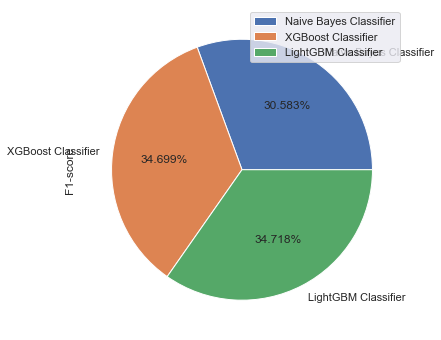

In [33]:
print("\nGroup No: 10\nMembers: Abiodun Ojo\n\t Sohrab Salehi")
plot = f1s.plot.pie(subplots=True, figsize=(10, 6), autopct='%1.3f%%')